### Analysis Summary

- There are 249 mice total, most of which showed a decline in tumor volume over time.
- There doesn't seem to be a strong correlation between weight and tumor volume; this correlation was moderate.
- The drugs Capomulin and Ramocane had the lowest variance, meaning they may be the more reliable drugs for desired results.
 

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

total_data = pd.merge(mouse_metadata, study_results, how="left")
total_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


### Analysis

In [2]:
number_mice = total_data["Mouse ID"].nunique()
number_mice

249

In [3]:
dupe_mice = total_data[total_data.duplicated(subset=['Mouse ID', 'Tumor Volume (mm3)'], keep=False)]
dupe_mice


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.0,0
909,g989,Propriva,Female,21,26,0,45.0,0


In [4]:
clean_data = total_data.drop_duplicates(subset="Mouse ID")
clean_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0
10,s185,Capomulin,Female,3,17,0,45.0,0
20,x401,Capomulin,Female,16,15,0,45.0,0
30,m601,Capomulin,Male,22,17,0,45.0,0
40,g791,Ramicane,Male,11,16,0,45.0,0
...,...,...,...,...,...,...,...,...
1858,z314,Stelasyn,Female,21,28,0,45.0,0
1860,z435,Propriva,Female,12,26,0,45.0,0
1863,z581,Infubinol,Female,24,25,0,45.0,0
1873,z795,Naftisol,Female,13,29,0,45.0,0


In [5]:
cleandata_micecount = len(clean_data["Mouse ID"])
cleandata_micecount

249

## Summary Statistics

In [6]:
# Statistics summary - mean, median, variance, standard deviation, SEM of tumor volume for each regimen
drug_mean = total_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
drug_median = total_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
drug_var = total_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
drug_sd = total_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
drug_sem = total_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

drug_dict = {
    "Drug Mean": drug_mean,
    "Drug Median": drug_median,
    "Drug Variance": drug_var,
    "Drug Standard Deviation": drug_sd,
    "Drug SEM": drug_sem
}

drug_df = pd.DataFrame(drug_dict)
drug_df

,Drug Mean,Drug Median,Drug Variance,Drug Standard Deviation,Drug SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

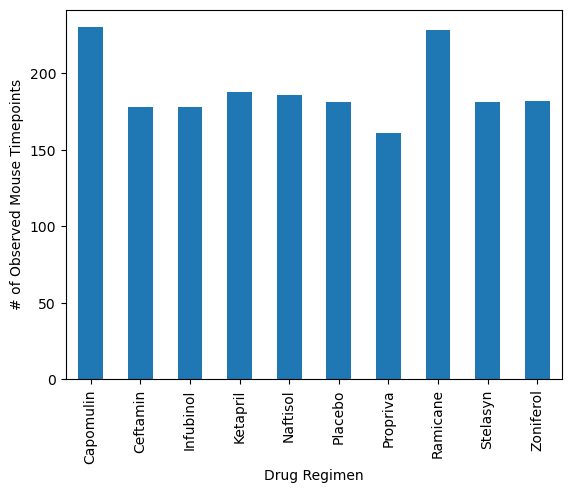

In [7]:
# Total number of rows (Mouse ID/Timepoints) for each regimen
plot_time = total_data.groupby('Drug Regimen')['Mouse ID'].count()
plot_drug = total_data['Drug Regimen'].unique()
plot_drug
plot_dict = {
    "Timepoint": plot_time,
    "Drug Regimen": plot_drug
}
plt_df = pd.DataFrame(plot_dict, columns=plot_dict)

bar_chart = plt_df['Timepoint'].plot(kind="bar", ylabel='# of Observed Mouse Timepoints')
plt.show()

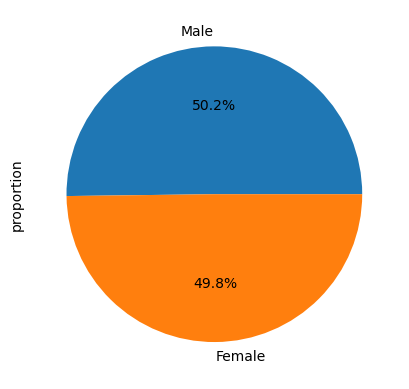

In [8]:
# Female versus male mice
plot_sex = clean_data['Sex'].value_counts('male')
pie_plot = plot_sex.plot(kind="pie", autopct='%1.1f%%')
plt.show()

## Quartiles, Outliers and Boxplots

In [9]:
# Last timepoint for each mouse
greatest_timepoints = total_data.groupby('Mouse ID').agg({'Timepoint': 'max', 'Drug Regimen': 'first', 'Tumor Volume (mm3)': 'first'}).reset_index()

# tumor volume at the last timepoint
first_last_timepoint = pd.merge(greatest_timepoints, clean_data, on='Mouse ID')
select_drugs = first_last_timepoint[first_last_timepoint['Drug Regimen_x'].isin(['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])]
select_drugs



,Mouse ID,Timepoint_x,Drug Regimen_x,Tumor Volume (mm3)_x,Drug Regimen_y,Sex,Age_months,Weight (g),Timepoint_y,Tumor Volume (mm3)_y,Metastatic Sites
0,a203,45,Infubinol,45.0,Infubinol,Female,20,23,0,45.0,0
1,a251,45,Infubinol,45.0,Infubinol,Female,21,25,0,45.0,0
3,a275,45,Ceftamin,45.0,Ceftamin,Female,20,28,0,45.0,0
6,a411,45,Ramicane,45.0,Ramicane,Male,3,22,0,45.0,0
7,a444,45,Ramicane,45.0,Ramicane,Female,10,25,0,45.0,0
...,...,...,...,...,...,...,...,...,...,...,...
239,y769,45,Ceftamin,45.0,Ceftamin,Female,6,27,0,45.0,0
240,y793,45,Capomulin,45.0,Capomulin,Male,17,17,0,45.0,0
241,y865,45,Ceftamin,45.0,Ceftamin,Male,23,26,0,45.0,0
245,z578,45,Ramicane,45.0,Ramicane,Male,11,16,0,45.0,0


In [10]:
# List of treatments for loop
drugs = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

tumor_vol = []

# IQR, outliers
quartile_column = select_drugs['Tumor Volume (mm3)_x']
quartiles = quartile_column.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[.75]
iqr = upperq-lowerq
print(f"The lower quartile of tumor volumes is: {lowerq}")
print(f"The upper quartile of tumor volumes is: {upperq}")
print(f"The interquartile range of tumor volumes is: {iqr}")
print(f"The median tumor volume is: {quartiles[.5]}")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"The lower bound is: {lower_bound}")
print(f"The upper bound is: {upper_bound}")

The lower quartile of tumor volumes is: 45.0
The upper quartile of tumor volumes is: 45.0
The interquartile range of tumor volumes is: 0.0
The median tumor volume is: 45.0
The lower bound is: 45.0
The upper bound is: 45.0


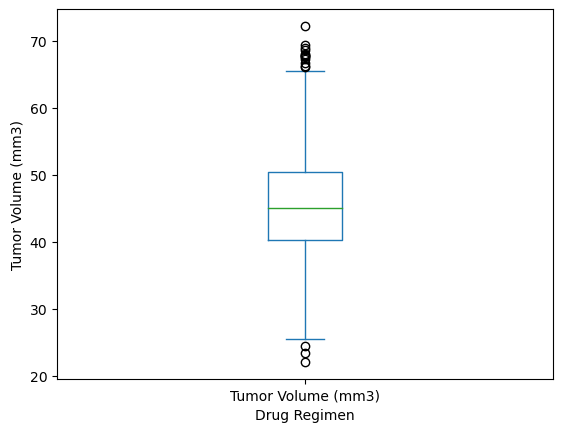

In [11]:
# Box plot - tumor volume for each treatment group
four_drugs = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
filtered_df = total_data.loc[total_data['Drug Regimen'].isin(four_drugs)]
result = filtered_df['Tumor Volume (mm3)']

box_plot = result.plot(kind="box", xlabel='Drug Regimen', ylabel='Tumor Volume (mm3)')

## Line and Scatter Plots

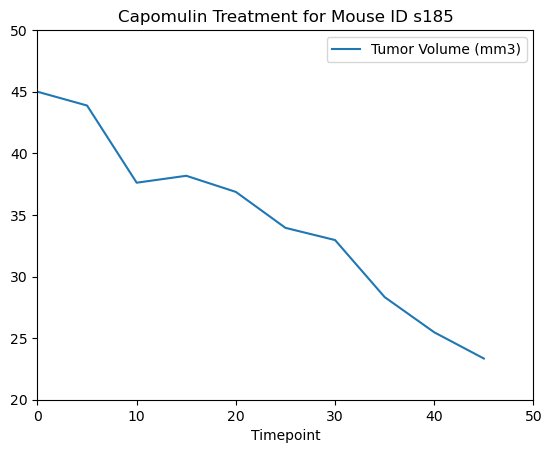

In [12]:
# Line plot - tumor volume vs. time point for a single mouse treated with Capomulin
mouse_df = total_data.set_index("Mouse ID")
single_mouse = mouse_df.loc['s185']

single_mouse.plot(x='Timepoint', y='Tumor Volume (mm3)', kind='line')
plt.title('Capomulin Treatment for Mouse ID s185')
plt.xlim(0,50)
plt.ylim(20,50)
plt.show()


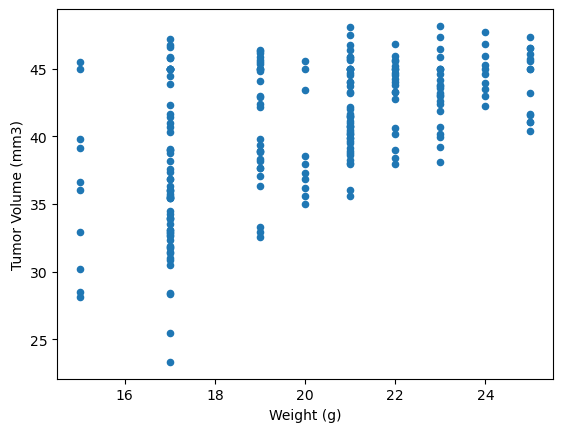

In [13]:
# Scatter plot - mouse weight vs average tumor volume for entire Capomulin regimen
capomulin_df = total_data.set_index('Drug Regimen')
capomulin_only = capomulin_df.loc['Capomulin']

capomulin_only.plot(x='Weight (g)', y='Tumor Volume (mm3)', kind='scatter')
plt.show()

## Correlation and Regression

In [14]:
# Correlation coefficient, linear regression model for mouse weight, average observed tumor volume for entire Capomulin regimen
weight = capomulin_only.iloc[:,3]
volume = capomulin_only.iloc[:,5]
correlation = st.pearsonr(weight,volume)
print(f"The correlation between weight and tumor volume is {round(correlation[0],2)}")

The correlation between weight and tumor volume is 0.53
